# GenAI with Python: LLM vs Agents

###### [Article: TowardsDataScience](https://towardsdatascience.com/genai-with-python-llm-vs-agents-5c3de7ec82a7)

### Text - LLM

In [2]:
#!pip install langchain #0.1.20
#!pip install langchain-community #0.0.38
from langchain_community.llms import Ollama 

llm = Ollama(model="phi3")
res = llm.invoke(input=["What day is today?"]).split("\n")[0]
print(res)

 As an AI, I don't have real-time capabilities. However, to find out the current date, you can check your device calendar or ask a voice-activated assistant like Google Assistant, Siri, or Amazon Alexa for this information.


In [7]:
#!pip install duckduckgo-search #6.1.7
from langchain.tools import DuckDuckGoSearchResults 

DuckDuckGoSearchResults().run("What day is today?")

"[snippet: Find out the date, time zone, day number, week number, month number, leap year, daylight saving time, and more for today's date. See also the sunrise, sunset, moonrise, moonset, moonphase, season, zodiac sign, and upcoming holidays for today., title: Today's Date - CalendarDate.com, link: https://www.calendardate.com/todays.htm], [snippet: Find out what day is today and what holidays and celebrations are coming up in the United States. See the calendar for 2024 and 2025 with moon phases, week numbers, and online calendars., title: Calendar (What Day is Celebrated Today?) - Calendarr, link: https://www.calendarr.com/united-states/], [snippet: National Today is a website that lists various holidays and celebrations for each day of the year. It does not show the current date or the day of the week, but it does have a calendar and a search function to find specific dates., title: National Today, link: https://nationaltoday.com/], [snippet: Find out today's date, day number, week

In [25]:
from langchain_community.tools import DuckDuckGoSearchRun

DuckDuckGoSearchRun().run("What day is today?")

"Find out the date, time zone, day number, week number, month number, leap year, daylight saving time, and more for today's date. See also the sunrise, sunset, moonrise, moonset, moonphase, zodiac sign, birthstone, birth flower, and upcoming holidays for today. Find out what day is today and what holidays and celebrations are coming up in the United States. See the calendar for 2024 and 2025 with moon phases, week numbers and more. Find out what holidays and events are happening today, tomorrow, or any date in the future. Browse by month, category, or keyword and discover fun facts, reviews, gifts, and more. Find out today's date, calendar, and date calculator for any day in the future or past. See the current date, month, week, and year, and print or download calendars for June and July 2024. What is the date today? Today's Date is June 30th, 2024.. Today's Date in My Local Timezone. June 30, 2024, 12:58 pm. What is the day name of the today's date? Sunday"

### Text - Agent

In [151]:
#!pip install crewai-tools #0.4.0
from crewai_tools import tool 

@tool("browser")
def tool_browser(q: str) -> str:
    """DuckDuckGo browser"""
    return DuckDuckGoSearchRun().run(q)

In [22]:
#!pip install crewai #0.35.0
import crewai

prompt = '''Find out what day is today'''

## Agent
agent = crewai.Agent(
            role="Calendar", 
            goal=prompt,
            backstory="You are a calendar assistant, you tell information about dates.",
            tools=[tool_browser], 
            llm=llm,
            allow_delegation=False, verbose=False)

## Task
task = crewai.Task(description=prompt, agent=agent, 
                   expected_output="today's date")

## Crew
crew = crewai.Crew(agents=[agent], tasks=[task], verbose=False)
res = crew.kickoff()
print("Res:", res)

2024-06-29 19:37:48,057 - 140704578535360 - __init__.py-__init__:518 - WARNING: Overriding of current TracerProvider is not allowed


 

Find out the current date, time zone, day number, week number, month number, leap year, daylight saving time, and more. See today's date in different formats and learn about upcoming holidays and zodiac signs. Find out what day is it today and what holidays and celebrations are coming up in the United States. See the calendar for 2024 and 2025 with moon phases, week numbers and online calendars. Your clock is 0.7 seconds behind. Accuracy of synchronization was ±0.276 seconds. Time in New York, United States now: 12:22:20am. Friday, June 28, 2024. Sun: ↑ 05:26AM ↓ 08:33PM (15h 7m) - More info - Make New York time default - Add to favorite locations. Tokyo. Find out the current date and time in different formats and time zones. Learn how many days are left in the week, month and year, and explore other useful time tracking tools. How To Calculate Today's Date Using Excel or Sheets. You can also calculate the current date using spreadsheet software such as Google Sheets or Microsoft Ex

### Images - LLM

data/ ['picA.jpeg', 'picB.jpeg']


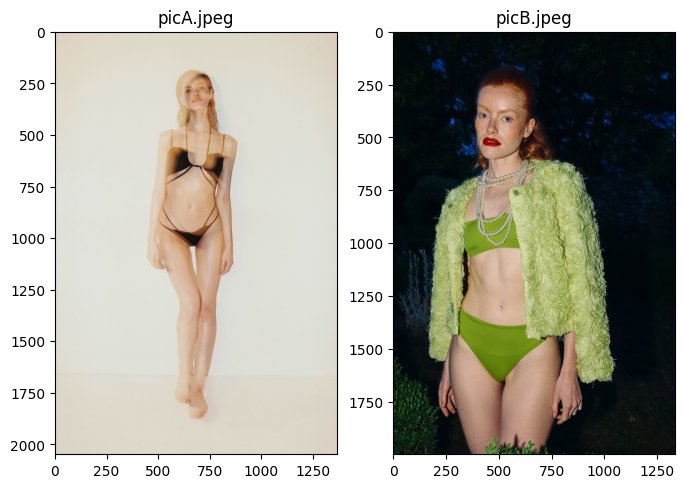

In [243]:
from matplotlib import image, pyplot
import os

path = 'data/'
folder = [x for x in os.listdir(path) if x.endswith(('.png','.jpg','.jpeg'))]
print(path, folder)

fig, ax = pyplot.subplots(nrows=1, ncols=len(folder), sharex=False, sharey=False, figsize=(4*len(folder),10))
for n,file in enumerate(folder):
    ax[n].imshow(image.imread(path+file))
    ax[n].set(title=file)

In [241]:
## Encode images into a string
import base64

def encode_image(path):
    with open(path, "rb") as file:
        return base64.b64encode(file.read()).decode('utf-8')

lst_imgs = [encode_image(path+i) for i in folder]
len(lst_imgs)

2

In [36]:
prompt = '''First you need to decide which picture will get more likes on Instagram and explain why.
            Then you need to write a caption that would maximize the conversion rate based on the image you chose.'''

vision_llm = Ollama(model="llava")

res = vision_llm.invoke(input=[prompt], images=lst_imgs)
print(res)

 Picture Selection:
I would choose the second image for a higher likelihood of getting more likes on Instagram. The reasons include:

1. Color Contrast: The yellow bikini stands out against the green top, which makes it visually appealing and draws attention.
2. Outfit Composition: The two-piece bikini is a bold choice, and the lace cover-up adds an interesting textural element that breaks up the solid color of the top.
3. Lighting: The lighting in this image appears to be more evenly distributed, creating a brighter and more flattering overall look.
4. Pose: The pose in the second image is slightly more dynamic with the arms slightly apart, which adds to the confidence portrayed by the model.
5. Facial Expression: The facial expression in the second image is subtler and less distracting than the first image's pose.

Caption Maximizing Conversion Rate:
"Embrace summer vibes with this chic two-piece bikini set! 🔥🏊‍♂️ Perfect for a sunny day by the beach or poolside. Swipe right to shop 

### Images - Agent

In [10]:
@tool("instagram")
def tool_instagram(q: str) -> str:
    '''Search Instagram'''
    return DuckDuckGoSearchRun().run(f"site:instagram.com {q}")

In [349]:
## Vision Model
vision_llm = Ollama(model="llava")

des = ""
for n,img in enumerate(lst_imgs):
    res = vision_llm.invoke(input=["Describe the image accurately"], images=[img])
    des = des.strip() + "\n\n" + f"image{n+1}: "+res.replace('\n',' ')

print(des)

image1:  The image shows a person standing against a plain background. The individual is wearing a black lingerie top with straps that crisscross over their torso, paired with transparent bottoms revealing the legs. The attire suggests a provocative or fashion-forward style. There are no visible texts or distinguishing features in the image that provide additional context about the setting or the person. The lighting is soft and evenly distributed, highlighting the contours of the person's body and the details of the clothing.

image2:  The image shows a woman posing in an outdoor setting. She has red hair and is wearing a green, lace-trimmed top with a scalloped pattern. Her makeup includes defined eyebrows and her hair is styled in loose waves. On the right side of her face, she has visible freckles.  She is also wearing high-waisted light blue bikini bottoms and is adorned with multiple necklaces. The woman's gaze is directed away from the camera, and her expression appears neutral.

In [156]:
prompt = '''First you need to decide which picture from the {images} will get more likes on Instagram and explain why 
            based on the description.
            Then you need to write a caption that would maximize the conversion rate based on the image you chose.
            You can consider the current season, today's date, any particular events of this month, trending hashtags and emojis, 
            to create the perfect caption.'''

## Agent
agent = crewai.Agent(
            role="Influencer", 
            goal=prompt,
            backstory="You are an influencer that maximizes the conversion rate of every post.",
            tools=[tool_instagram], 
            llm=llm,
            allow_delegation=False, verbose=True)

## Task
task = crewai.Task(description=prompt, agent=agent,
                   expected_output='''the best picture and caption for an Instragram post''')

## Crew
crew = crewai.Crew(agents=[agent], tasks=[task], verbose=True)
res = crew.kickoff(inputs={"images":des})
print("Res:", res)

2024-07-03 21:33:49,218 - 140704296546240 - __init__.py-__init__:518 - WARNING: Overriding of current TracerProvider is not allowed


 [2024-07-03 21:33:49][DEBUG]: == Working Agent: Influencer
 [2024-07-03 21:33:49][INFO]: == Starting Task: First you need to decide which picture from the  The image shows a person modeling lingerie. The individual is wearing a green, textured crop top with a high neckline and matching bottoms. They also have on a light green, fluffy cardigan over the outfit. The model has short, dark hair and is looking off to the side with a neutral expression. There are no visible texts or logos in the image.

The background is blurred and out of focus, which suggests that this could be from a fashion shoot where the focus is on the clothing rather than the setting. The lighting appears soft and even, typical for professional photography aimed at showcasing attire.  will get more likes on Instagram and explain why 
            based on the description.
            Then you need to write a caption that would maximize the conversion rate based on the image you chose.
            You can consider the 

### Images - Multiple Agents

In [12]:
def callback_function(output):
    print(f"Task completed... Output: {output.raw_output}")

In [352]:
######################## 1-Photographer #########################
prompt = '''Choose the picture from {images} that would get more likes on Instagram.'''

## Agent
agent_photograper = crewai.Agent(
    role="Photographer",
    goal=prompt,
    backstory='''As the Photographer, you need to understand which picture would get more likes on Instagram,
     make more people interact with the post, and maximize the conversion rate.
     Search about the current season, today's date, any particular events of this month.
     ''',
    tools=[tool_instagram], 
    max_iter=3,
    llm=llm,
    allow_delegation=False, verbose=True)

## Task
task_photograper = crewai.Task(
    description=prompt,
    agent=agent_photograper,
    callback=callback_function,
    expected_output='''Image that you chose and explain why you think is the best''')

In [353]:
######################## 2-Social Media Manager ##################
prompt = '''Write a caption for the post that would maximize the conversion rate on Instagram based on the image.'''

## Agent
agent_social = crewai.Agent(
    role="Social Media Manager",
    goal=prompt,
    backstory='''As the Social Media Manager, you must generate a short caption based on the output from the Photographer
     that would get more likes on Instagram, make more people interact with the post, and maximize the conversion rate. 
     Search about trending topics, hashtags and emojis. 
     ''',
    tools=[tool_instagram], 
    max_iter=3,
    llm=llm,
    allow_delegation=False, verbose=True)

## Task
task_social = crewai.Task(
    description=prompt,
    agent=agent_social,
    expected_output='''Short caption for Instagram post''')

In [354]:
######################## 3-Manager of the other Agents #############
prompt = '''Oversee the post creation process, choose the best picture that that maximizes the likes of the post,
            and write the best caption that maximizes the conversion rate for the post.'''

## Agent
agent_manager = crewai.Agent(
    role="Manager of the other Agents",
    goal=prompt,
    backstory='''As the manager of the process, you follow every step to create the perfect Instagram post:
     1-Choose the picture that would get more likes on Instagram with the Photograper.
     2-Write a caption for the post that would maximize the conversion rate on Instagram based on the image with the Social Media Manager.
     At the end of the process, you MUST ask the human for final approval, use the human input tool. 
     ''',
    max_iter=3,
    llm=llm,
    allow_delegation=True, verbose=True)

## Task
task_manager = crewai.Task(
    description=prompt, agent=agent_manager,
    human_input=True,
    expected_output='''Best image and short caption, basically the whole Instagram post''')

In [355]:
######################## Run ####################################
crew = crewai.Crew(agents=[agent_photograper, agent_social], 
                   tasks=[task_photograper, task_social, task_manager], 
                   process=crewai.Process.hierarchical,
                   manager_agent=agent_manager,
                   verbose=True)

res = crew.kickoff(inputs={"images":des})

print("\n---Res---\n"+res)

print(f'''\n---Debug---
    - task_photograper Output: {task_photograper.output.raw_output}
    - task_social Output: {task_social.output.raw_output}
    - task_manager Output: {task_manager.output.raw_output}
    ''')

2024-07-04 13:44:55,707 - 140704296546240 - __init__.py-__init__:518 - WARNING: Overriding of current TracerProvider is not allowed


 [2024-07-04 13:44:55][DEBUG]: Working Agent: Manager of the other Agents
 [2024-07-04 13:44:55][INFO]: Starting Task: Choose the picture from image1:  The image shows a person standing against a plain background. The individual is wearing a black lingerie top with straps that crisscross over their torso, paired with transparent bottoms revealing the legs. The attire suggests a provocative or fashion-forward style. There are no visible texts or distinguishing features in the image that provide additional context about the setting or the person. The lighting is soft and evenly distributed, highlighting the contours of the person's body and the details of the clothing.

image2:  The image shows a woman posing in an outdoor setting. She has red hair and is wearing a green, lace-trimmed top with a scalloped pattern. Her makeup includes defined eyebrows and her hair is styled in loose waves. On the right side of her face, she has visible freckles.  She is also wearing high-waisted light blu